In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('risk.csv')

In [ ]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df.head(6)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [ ]:
df.shape

(520, 17)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


<ipython-input-23-7a8a9ea5847f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


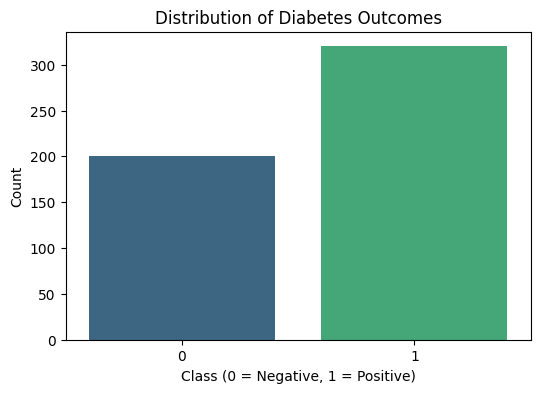

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Diabetes Outcomes")
plt.xlabel("Class (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


In [ ]:
encoded_data = df.copy()

for column in encoded_data.columns:
    if encoded_data[column].dtype == 'object':
        encoded_data[column] = LabelEncoder().fit_transform(encoded_data[column])

In [ ]:
X = encoded_data.drop(columns=['class'])
y = encoded_data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(104, 16)
(104,)
(416, 16)
(416,)


In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_lr=lr.predict(X_test)

In [ ]:
y_pred_dt=dt.predict(X_test)

In [ ]:
y_pred_rf=rf.predict(X_test)

In [ ]:
y_pred_nb=nb.predict(X_test)

In [ ]:
y_pred_svm=svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_lr)

0.9230769230769231

In [ ]:
accuracy_score(y_test,y_pred_dt)

0.9423076923076923

In [ ]:
accuracy_score(y_test,y_pred_rf)

0.9903846153846154

In [ ]:
accuracy_score(y_test,y_pred_svm)

0.8942307692307693

In [ ]:
accuracy_score(y_test,y_pred_nb)

0.9134615384615384

In [ ]:
lr_report=classification_report(y_test,y_pred_lr)
print(lr_report)

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



In [ ]:
rf_report=classification_report(y_test,y_pred_rf)
print(rf_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [ ]:
dt_report=classification_report(y_test,y_pred_dt)
print(dt_report)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.99      0.93      0.96        71

    accuracy                           0.94       104
   macro avg       0.92      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



In [ ]:
svm_report=classification_report(y_test,y_pred_svm)
print(svm_report)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.93      0.92      0.92        71

    accuracy                           0.89       104
   macro avg       0.88      0.88      0.88       104
weighted avg       0.90      0.89      0.89       104



In [ ]:
nb_report=classification_report(y_test,y_pred_nb)
print(nb_report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104



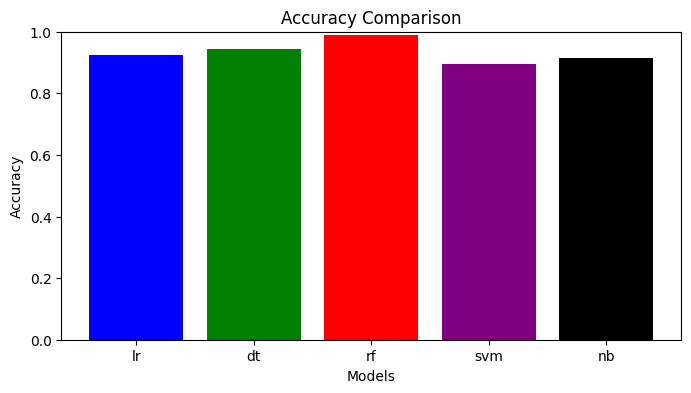

In [ ]:
#accuracy bar graph
models=['lr','dt','rf','svm','nb']
#accuracy bar graph
import matplotlib.pyplot as plt
models=['lr','dt','rf','svm','nb']
accuracy=[accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_svm),accuracy_score(y_test,y_pred_nb)]
plt.figure(figsize=(8,4))
plt.bar(models,accuracy,color=['blue','green','red','purple','black'])
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

In [ ]:
cm=confusion_matrix(y_test,y_pred_rf)
print(cm)

[[33  0]
 [ 1 70]]


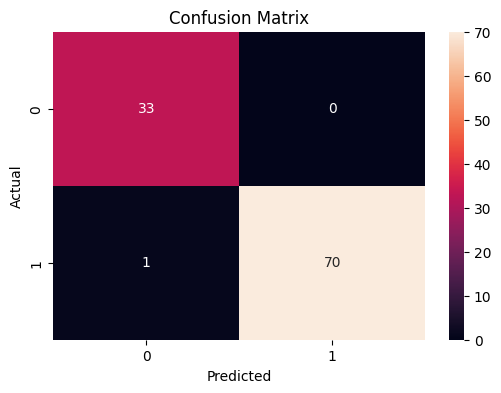

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()